In [1]:
import numpy as np
import skimage.io as skio

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def px_neighbors(img, dist=1, n_pairs=-1, seed=42):
    indices = np.arange(img.size)
    np.random.seed(seed)
    np.random.shuffle(indices)
    if n_pairs > 0:
        indices = indices[:n_pairs]
    x1, x2 = [], []
    for idx in indices:
        row, col = np.unravel_index(idx, img.shape)
        if row + dist < img.shape[0]:
            x1.append(img[row, col])
            x2.append(img[row + dist, col])
        if col + dist < img.shape[1]:
            x1.append(img[row, col])
            x2.append(img[row, col + dist])
    return x1, x2

In [3]:
# Image source: https://pixabay.com/en/giant-anteater-animal-406712/ CC-0
img = skio.imread('anteater.jpg', as_grey=True)

# Fig. 2A:

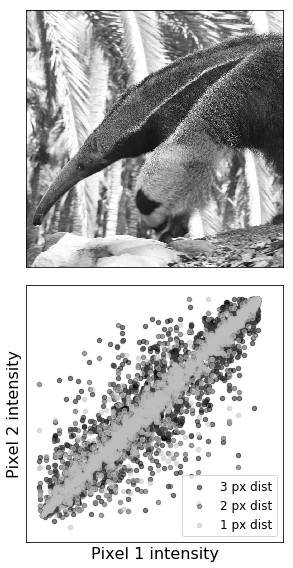

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(6, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
for dist, gray in zip([3, 2, 1], [0, 0.25, 0.75]):
    ax[1].scatter(*px_neighbors(img, dist=dist, n_pairs=1000),
                  alpha=0.5, s=20,
                  c=(gray, gray, gray),
                  label='%d px dist' % dist)
ax[1].axis('square')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].legend(loc='lower right', fontsize=12)
ax[1].set_xlabel('Pixel 1 intensity', fontsize=16)
ax[1].set_ylabel('Pixel 2 intensity', fontsize=16)
fig.tight_layout()
fig.savefig('fig-2A.eps')